#Self

Work Distribution

Vaibhav Jain - Decision Tree , Gradient Boosting , Random Forest , XgBoost   , PCA  

Nicky Ghai - Data Cleaning , EDA , Outlier Removal , lasso Regression , Ridge Regression 



**Importing Library and connecting drive**



In [ ]:
# Load the necessary python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
SeoulBikeData = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',sep=',',encoding='latin')


In [ ]:
# Print the first 5 rows of the dataframe.

SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes



#Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [ ]:
tree.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred=tree.predict(X_test)

In [ ]:

r2_score(Y_test, y_pred)

0.7351061450937186

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.7338483395148664


In [ ]:
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 106880.004251299
RMSE : 326.9250743691878


In [ ]:

MAE  = mean_absolute_error(Y_test, y_pred)
print("MAE :" , MAE)

MAE : 188.38592347661785


Text(0, 0.5, 'Predicted')

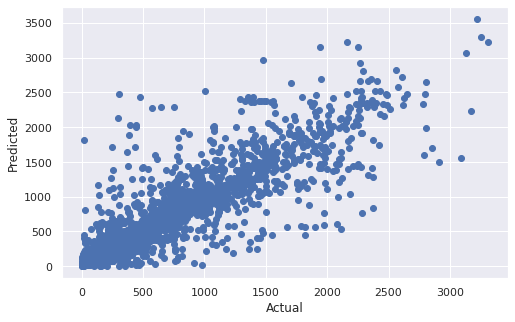

In [ ]:

plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

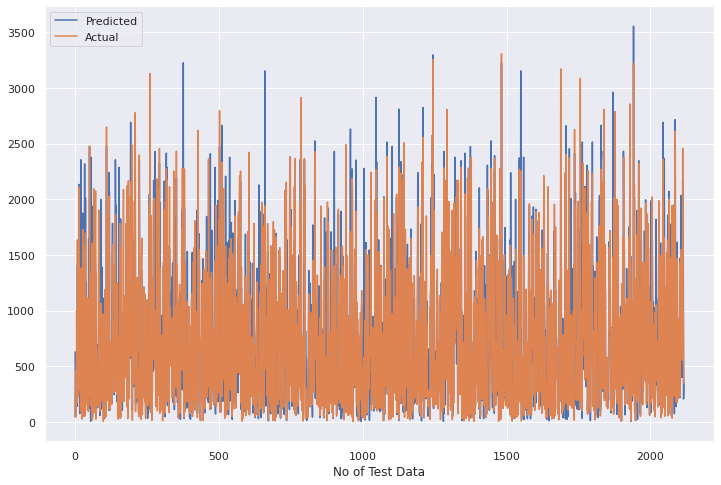

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_pred)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [ ]:
tree.feature_importances_

array([0.31872824, 0.35508148, 0.12092257, 0.02036553, 0.01868023,
       0.10158271, 0.01906065, 0.00116169, 0.04135652, 0.00306039])

In [ ]:
features = X.columns
importances = tree.feature_importances_
indices = np.argsort(importances)

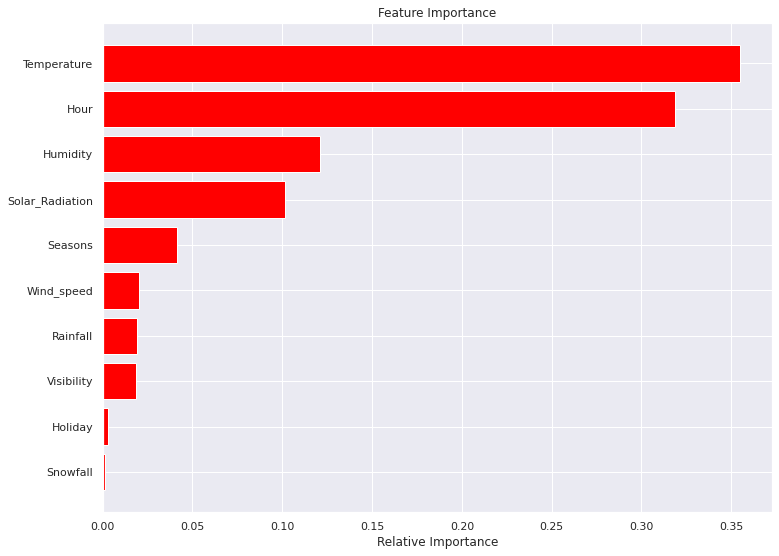

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#GradiantBoosting Algorithm

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
ensemble = GradientBoostingRegressor()

In [ ]:
ensemble.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:

y_pred=ensemble.predict(X_test)

In [ ]:
r2_score(Y_test, y_pred)

0.831627546241016

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.8308280569069277


In [ ]:
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 67935.31914860262
RMSE : 260.64404683131096


In [ ]:
MAE  = mean_absolute_error(Y_test, y_pred)
print("MAE :" , MAE)

MAE : 174.0811347280319


Text(0, 0.5, 'Predicted')

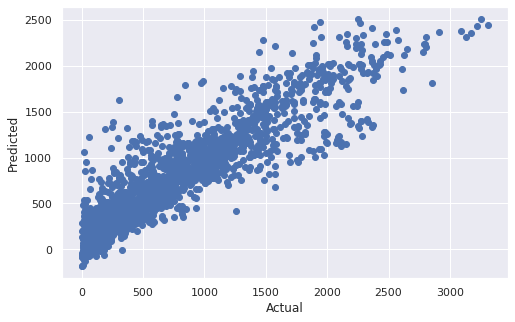

In [ ]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

#RandomForest Algorithm


Parameter tuning on ‘n_estimators’, ‘max_depth’ and ‘min_samples_leaf’ parameters.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ensemble_regressior = RandomForestRegressor()

In [ ]:
ensemble_regressior.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred=ensemble_regressior.predict(X_test)

In [ ]:
r2_score(Y_test, y_pred)

0.8540482368707042

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.8533552085557503


In [ ]:
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 58888.96542829475
RMSE : 242.67048734507202


In [ ]:
MAE  = mean_absolute_error(Y_test, y_pred)
print("MAE :" , MAE)

MAE : 150.27843646669814


Text(0, 0.5, 'Predicted')

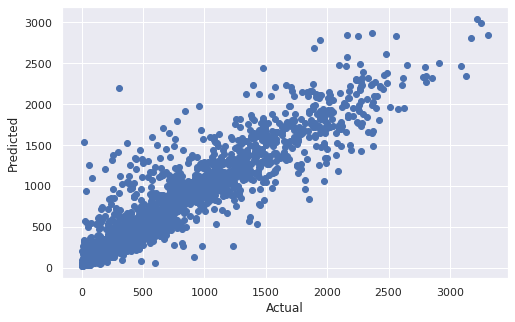

In [ ]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

#XGBoost

In [ ]:
import xgboost as xgb

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, Y_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(Y_test, y_pred)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(Y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, Y_train)
test_score = dreg.score(X_test,Y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
r2

[07:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.9669850295574288
Test score: 0.8662260483087465


0.8662260483087465

In [ ]:

r2

0.8662260483087465

In [ ]:
adj_r2

0.8657453657658387

In [ ]:

MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 54287.031544213925
RMSE : 232.9957758076612


In [ ]:
MAE  = mean_absolute_error(Y_test, y_pred)
print("MAE :" , MAE)

MAE : 143.48340080681663


Cat boost

In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 43kB/s 


In [ ]:

from catboost import CatBoostRegressor
import timeit

from sklearn.datasets import make_regression

In [ ]:
model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.03
  )

In [ ]:
model.fit(
      X_train, Y_train,
      eval_set=(X_test, Y_test),
      verbose=10);

0:	learn: 631.5916137	test: 624.0208755	best: 624.0208755 (0)	total: 49.1ms	remaining: 4.86s
10:	learn: 528.0301750	test: 520.7406579	best: 520.7406579 (10)	total: 76.3ms	remaining: 617ms
20:	learn: 455.0097540	test: 448.0552316	best: 448.0552316 (20)	total: 99.6ms	remaining: 375ms
30:	learn: 403.2104051	test: 396.9966781	best: 396.9966781 (30)	total: 127ms	remaining: 282ms
40:	learn: 365.9420642	test: 360.2023266	best: 360.2023266 (40)	total: 150ms	remaining: 216ms
50:	learn: 338.5169147	test: 334.2317422	best: 334.2317422 (50)	total: 173ms	remaining: 166ms
60:	learn: 320.1525756	test: 316.5654578	best: 316.5654578 (60)	total: 211ms	remaining: 135ms
70:	learn: 305.1875732	test: 302.5257141	best: 302.5257141 (70)	total: 235ms	remaining: 96ms
80:	learn: 294.1659226	test: 292.0153816	best: 292.0153816 (80)	total: 261ms	remaining: 61.2ms
90:	learn: 284.8812130	test: 283.4881271	best: 283.4881271 (90)	total: 291ms	remaining: 28.7ms
99:	learn: 278.0065496	test: 277.2139971	best: 277.2139971

In [ ]:
def train_on_cpu():  
  model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.03
  )
  
  model.fit(
      X_train, Y_train,
      eval_set=(X_test, Y_test),
      verbose=10
  );   
      
cpu_time = timeit.timeit('train_on_cpu()', 
                         setup="from __main__ import train_on_cpu", 
                         number=1)

print('Time to fit model on CPU: {} sec'.format(int(cpu_time)))

0:	learn: 631.5916137	test: 624.0208755	best: 624.0208755 (0)	total: 2.71ms	remaining: 268ms
10:	learn: 528.0301750	test: 520.7406579	best: 520.7406579 (10)	total: 26.5ms	remaining: 214ms
20:	learn: 455.0097540	test: 448.0552316	best: 448.0552316 (20)	total: 50.1ms	remaining: 188ms
30:	learn: 403.2104051	test: 396.9966781	best: 396.9966781 (30)	total: 73.3ms	remaining: 163ms
40:	learn: 365.9420642	test: 360.2023266	best: 360.2023266 (40)	total: 102ms	remaining: 146ms
50:	learn: 338.5169147	test: 334.2317422	best: 334.2317422 (50)	total: 127ms	remaining: 122ms
60:	learn: 320.1525756	test: 316.5654578	best: 316.5654578 (60)	total: 150ms	remaining: 96.1ms
70:	learn: 305.1875732	test: 302.5257141	best: 302.5257141 (70)	total: 173ms	remaining: 70.8ms
80:	learn: 294.1659226	test: 292.0153816	best: 292.0153816 (80)	total: 197ms	remaining: 46.2ms
90:	learn: 284.8812130	test: 283.4881271	best: 283.4881271 (90)	total: 221ms	remaining: 21.9ms
99:	learn: 278.0065496	test: 277.2139971	best: 277.213

In [ ]:
# Predicting the Test set results

y_pred = model.predict(X_test)

In [ ]:
import math
math.sqrt(mean_squared_error(Y_test, y_pred))

277.2139971320696

In [ ]:
r2_score(Y_test, y_pred)

0.8106323579478576

In [ ]:
adj_r2

0.8657453657658387

In [ ]:
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 76847.60020593909
RMSE : 277.2139971320696


In [ ]:

MAE  = mean_absolute_error(Y_test, y_pred)
print("MAE :" , MAE)

MAE : 192.4843791565666


In [ ]:

# Validating Assumptions

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [ ]:
# Evaluation of training Data

print_metrics(Y_train, y_train_pred)

MSE is 77287.64163720791
RMSE is 278.0065496300544
RMSE is 0.8141411569704782
MAE is 195.13166380692934
MAPE is 89.5093241100718


In [ ]:
# Test dataset metrics

print_metrics(Y_test, y_test_pred)

MSE is 76847.60020593909
RMSE is 277.2139971320696
RMSE is 0.8106323579478576
MAE is 192.4843791565666
MAPE is 82.15351168777153


#Grid Search CV on XGboost algorithm

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [ ]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [ ]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, Y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[07:21:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[07:21:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   52.1s finished


[07:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
 

In [ ]:

reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 9,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
reg_optimal_model =reg_gs.best_estimator_

In [ ]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [ ]:
reg_optimal_model.score(X_test,Y_test)

0.9447339650042254

#For Train dataset:

In [ ]:
#Find R-squared value

r2 = r2_score(Y_test, test_preds)

# Find Adjusted R-squared value

adj_r2=1-(1-r2_score(Y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [ ]:
r2

0.9447339650042254

In [ ]:
adj_r2

0.9445353806168888

# For Train dataset

In [ ]:
#Find R-squared value
r2 = r2_score(Y_train, train_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(Y_train, train_preds))*((X_train.shape[0]-1)/(X_train.shape[0]-X_test.shape[1]-1))

In [ ]:
r2

0.9485426027944392

In [ ]:
adj_r2

0.9484516886651008

**We have nearly same r2 score for both the datasets,train and test which leads towards optimal model.**

#Principal Component Analysis

In [ ]:

# import libraries for PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
# X = df.drop('MEDV',axis=1)
X_pca = pca.fit_transform(X)

In [ ]:
print(pca.components_)

[[-1.18153753e-03 -5.59596564e-04  1.84611219e-02 -3.06604467e-04
  -9.99828599e-01 -2.18479636e-04  3.14923571e-04  8.95836866e-05
   4.58745002e-05 -7.81710901e-06]
 [ 8.33484125e-02 -2.63955751e-01 -9.60011368e-01  1.67888430e-02
  -1.76904292e-02  1.77698494e-02 -1.09468539e-02 -2.22004993e-04
  -2.69764325e-02  6.18464483e-04]
 [ 1.75779308e-01  9.49682398e-01 -2.46810716e-01  7.85664204e-03
  -5.30502966e-03  3.86761950e-02 -2.27616638e-04 -8.75922136e-03
   6.80171585e-02 -7.87782427e-04]
 [ 9.80127499e-01 -1.46635537e-01  1.26154097e-01  3.19024579e-02
   1.25012311e-03 -1.46935937e-02  1.32003516e-02  4.53682891e-03
  -2.24317823e-02 -7.44074035e-06]
 [-1.74296932e-02 -4.09252963e-03 -7.65691228e-03  1.85185111e-01
   1.19674311e-04  6.47221273e-02  9.80180878e-01 -5.56436118e-03
   1.87828819e-02  1.54052880e-04]
 [ 2.77500231e-02  9.37309922e-03 -2.32676313e-02 -9.39140374e-01
  -6.10039551e-05 -2.76808750e-01  1.96361176e-01 -2.89034911e-02
  -2.42464358e-02 -3.45784200e-03

In [ ]:
print(pca.explained_variance_)

[3.71070493e+05 3.08269408e+02 1.37489840e+02 4.26688625e+01
 1.19646116e+00 9.34367180e-01 4.27018283e-01]


In [ ]:
df_pca = pd.DataFrame(X_pca,columns=['F1','F2','F3','F4','F5','F6','F7'])
df_pca['Rented_Bike_Count'] = SeoulBikeData['Rented_Bike_Count']

In [ ]:

df_pca.head()

,F1,F2,F3,F4,F5,F6,F7,Rented_Bike_Count
0,-566.396379,14.111535,-16.994444,-10.547954,0.380509,-0.308301,-0.183059,254.0
1,-566.378502,13.290555,-17.361379,-9.442345,0.097391,1.008166,0.026916,204.0
2,-566.361004,12.549227,-17.905681,-8.256366,0.111387,0.820133,-0.007089,173.0
3,-566.343582,11.723677,-18.167434,-7.123947,0.068601,0.916655,0.015741,107.0
4,-566.419149,15.617784,-16.803476,-6.633100,0.340239,-0.275446,-0.257752,78.0


In [ ]:
df_pca.corr().abs()

,F1,F2,F3,F4,F5,F6,F7,Rented_Bike_Count
F1,1.000000e+00,3.775717e-16,2.564387e-16,4.937555e-16,1.346231e-16,2.824023e-17,5.085907e-17,0.099815
F2,3.775717e-16,1.000000e+00,1.227221e-16,4.143248e-16,1.515711e-17,2.225887e-17,1.042564e-16,0.130500
F3,2.564387e-16,1.227221e-16,1.000000e+00,1.316774e-16,3.805482e-17,1.702413e-16,5.536939e-17,0.529936
F4,4.937555e-16,4.143248e-16,1.316774e-16,1.000000e+00,1.259959e-16,1.602424e-16,1.036691e-16,0.217682
F5,1.346231e-16,1.515711e-17,3.805482e-17,1.259959e-16,1.000000e+00,2.799380e-17,1.451709e-16,0.006351
F6,2.824023e-17,2.225887e-17,1.702413e-16,1.602424e-16,2.799380e-17,1.000000e+00,4.057674e-17,0.038303
F7,5.085907e-17,1.042564e-16,5.536939e-17,1.036691e-16,1.451709e-16,4.057674e-17,1.000000e+00,0.066110
Rented_Bike_Count,9.981496e-02,1.304999e-01,5.299355e-01,2.176819e-01,6.350610e-03,3.830251e-02,6.610950e-02,1.000000


In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:

calc_vif(df_pca[[feature for feature in df_pca.describe().columns if feature not in ['Rented_Bike_Count']]])

,variables,VIF
0,F1,1.0
1,F2,1.0
2,F3,1.0
3,F4,1.0
4,F5,1.0
5,F6,1.0
6,F7,1.0


<Figure size 1152x1728 with 0 Axes>

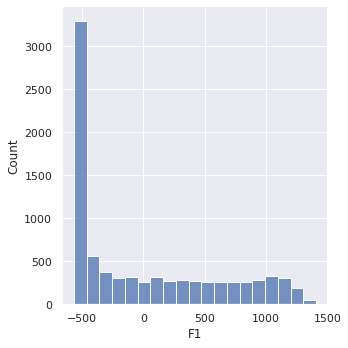

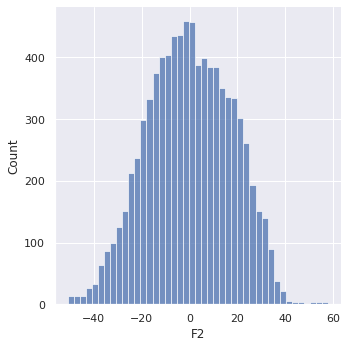

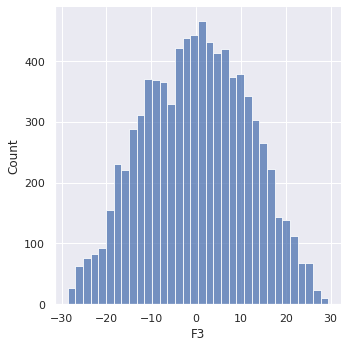

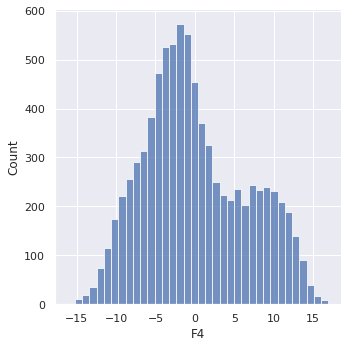

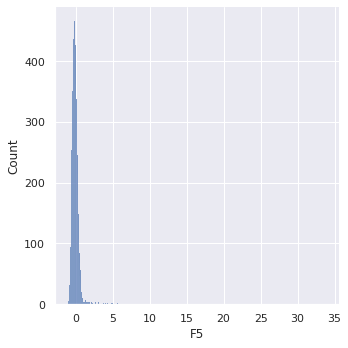

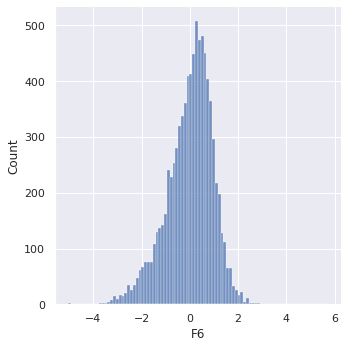

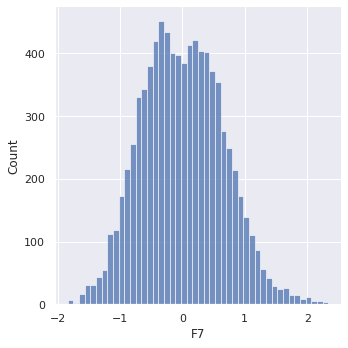

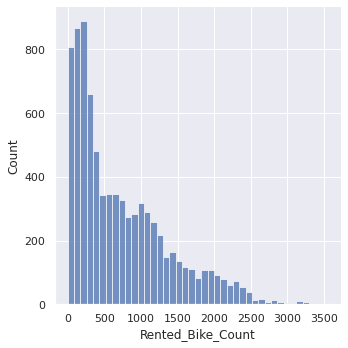

In [ ]:

# Lets look at the distribution plot of the features
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df_pca.columns:
    pos = pos + 1
    sns.displot(df_pca[i])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error

In [ ]:

X_train,X_test,Y_train,Y_test = train_test_split(X , Y, test_size=0.20)


print("Shape of Train data set is",X_train.shape,Y_train.shape)
print("Shape of X_test is ",X_test.shape,Y_test.shape)

Shape of Train data set is (6772, 10) (6772,)
Shape of X_test is  (1693, 10) (1693,)


In [ ]:
### Cross validation

lasso = Lasso()
parameters = {'alpha': [1e-7,1e-3,1e-2,1e-1,1,5,10,20,100]}
regressor = GridSearchCV(lasso, parameters, cv=8)
regressor.fit(X_train, Y_train)

GridSearchCV(cv=8, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-07, 0.001, 0.01, 0.1, 1, 5, 10, 20, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
optimal=regressor.best_estimator_

In [ ]:
y_pred=optimal.predict(X_test)
y_pred_train=optimal.predict(X_train)

In [ ]:

MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 197345.52229761105
RMSE : 444.23588587327237


In [ ]:
#Train datset
r2 = r2_score(Y_train, y_pred_train)
print("R2 :" ,r2)

R2 : 0.5154402249045439


In [ ]:
#test dataset
r2 = r2_score(Y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.5109731027732771


#Grid Search CV on XGboost algorithm

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [ ]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [ ]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, Y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[07:22:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[07:22:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:22:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:22:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:22:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:22:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:22:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:22:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:22:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   51.9s finished


[07:22:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
 

In [ ]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 9,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
reg_optimal_model =reg_gs.best_estimator_

In [ ]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [ ]:
reg_optimal_model.score(X_test,Y_test)

0.9494749342888162

In [ ]:
##For Train dataset:

#Find R-squared value
r2 = r2_score(Y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(Y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))


In [ ]:

r2

0.9494749342888161

In [ ]:

adj_r2

0.9491745474534345

In [ ]:

MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(Y_test, y_pred)
print("MAE :" , MAE)

MSE : 197345.52229761105
RMSE : 444.23588587327237
MAE : 331.42610120019657
